In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = {
    "Comp. verbale" : {
        "INF" : 10,
        "SIM" : 13,
        "VOC" : 12,
        "COS" : 15
    },
    "Visuo-spatiale" : {
        "CUB" : 14,
        "AOB" : 10
    },
    "Rais. fluide" : {
        "MAT" : 7,
        "IDC" : 10
    },
    "Mém. de travail" :{
        "REC" : 10,
        "MSP": 7
    },
    "Vitesse trait." :{
        "SYM": 7,
        "BAR" : 4,
        "COD" : 5
    }
}

In [4]:
scores = pd.DataFrame.from_dict(data).stack().reset_index()
scores.columns = ['indice', 'cat', 'score']
scores = scores.set_index(['cat', 'indice'])
scores["indice"] = scores.index.get_level_values("indice")
scores

score indice
cat             indice              
Comp. verbale   INF      10.0    INF
                SIM      13.0    SIM
                VOC      12.0    VOC
                COS      15.0    COS
Visuo-spatiale  CUB      14.0    CUB
                AOB      10.0    AOB
Rais. fluide    MAT       7.0    MAT
                IDC      10.0    IDC
Mém. de travail REC      10.0    REC
                MSP       7.0    MSP
Vitesse trait.  SYM       7.0    SYM
                BAR       4.0    BAR
                COD       5.0    COD

In [5]:
scores.score.values

array([10., 13., 12., 15., 14., 10.,  7., 10., 10.,  7.,  7.,  4.,  5.])

In [6]:
def plot(scores) :
    
    # Créer le graphique
    fig, ax = plt.subplots(figsize=(8, 5), layout="constrained")
    
    
    # Références horizontales
    for y, color in zip([4, 7, 10, 13, 16], ["orange", "blue", "red", "blue", "orange"]):
        ax.axhline(y, color=color, linewidth=1.5, linestyle="-", zorder=0)
    
    # Barres
    b = sns.barplot(data=scores, x="indice", y='score', hue='cat', palette='Set2', ax=ax, width=0.5)
    b.legend_.remove()
    
    # Axe principal (labels des tests)
    x = np.arange(len(scores))
    ax.set_xticks(x)
    ax.set_xticklabels(scores.index.get_level_values("indice"), rotation=0)
    ax.set_ylim(1, 19)
    ax.set_ylabel("Notes")
    
    # Afficher les scores sous les barres
    for i, score in enumerate(scores.score.values):
        ax.text(i, score + 0.3, str(int(score)), ha='center', va='bottom', fontsize=9)
    
    # Axe secondaire pour les catégories
    sec = ax.secondary_xaxis(location=0)
    group_labels = []
    group_centers = []
    current_group = None
    start = 0
    
    # Calcul des centres pour les groupes
    for i, (cat, _) in enumerate(scores.index):
        if cat != current_group:
            if current_group is not None:
                center = (start + i - 1) / 2
                group_centers.append(center)
                group_labels.append(current_group)
            current_group = cat
            start = i
    # Ajouter le dernier groupe
    center = (start + len(scores) - 1) / 2
    group_centers.append(center)
    group_labels.append(current_group)
    
    sec.set_xticks(group_centers)
    sec.set_xticklabels(["\n\n" + label for label in group_labels])
    sec.tick_params('x', length=0)
    
    # Axe secondaire pour lignes séparatrices
    sec2 = ax.secondary_xaxis(location=0)
    boundaries = [-0.5]
    for i in range(1, len(scores)):
        if scores.index[i][0] != scores.index[i - 1][0]:
            boundaries.append(i - 0.5)
    boundaries.append(len(scores) - 0.5)
    
    sec2.set_xticks(boundaries)
    sec2.set_xticklabels([])
    sec2.tick_params('x', length=30, width=1.5)
    ax.set_xlim(-0.6, len(scores) - 0.4)
    
    plt.title("Profil des notes standard")
    plt.xlabel('')
    plt.show()

NameError: name 'df' is not defined

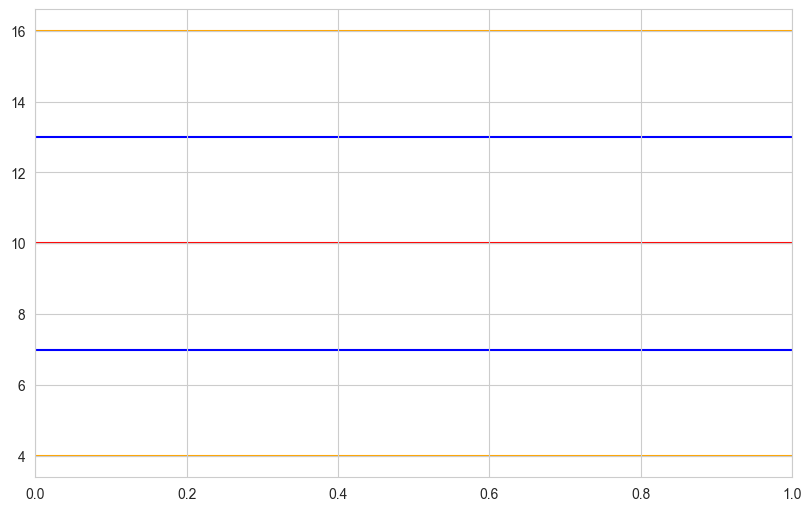

In [7]:
plot(scores)